In [3]:
#import library
import pandas as pd
import numpy as np
import seaborn as sns
import os
import datetime
%matplotlib inline

In [2]:
#Read dataset

In [5]:
df = pd.read_csv("AEP_hourly.csv")

In [6]:
df.head()

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  121273 non-null  object 
 1   AEP_MW    121273 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.9+ MB


In [10]:
df.describe()

,AEP_MW
count,121273.000000
mean,15499.513717
std,2591.399065
min,9581.000000
25%,13630.000000
50%,15310.000000
75%,17200.000000
max,25695.000000


In [12]:
df['New_Date'] = pd.to_datetime(df['Datetime']).dt.date
df['New_Time'] = pd.to_datetime(df['Datetime']).dt.time

In [13]:
df1 = df

In [14]:
df1.head()

,Datetime,AEP_MW,New_Date,New_Time
0,2004-12-31 01:00:00,13478.0,2004-12-31,01:00:00
1,2004-12-31 02:00:00,12865.0,2004-12-31,02:00:00
2,2004-12-31 03:00:00,12577.0,2004-12-31,03:00:00
3,2004-12-31 04:00:00,12517.0,2004-12-31,04:00:00
4,2004-12-31 05:00:00,12670.0,2004-12-31,05:00:00


In [15]:
df1["AEP_MW"]

0         13478.0
1         12865.0
2         12577.0
3         12517.0
4         12670.0
           ...   
121268    21089.0
121269    20999.0
121270    20820.0
121271    20415.0
121272    19993.0
Name: AEP_MW, Length: 121273, dtype: float64

In [16]:
df["AEP_MW"].max()

25695.0

In [17]:
df1["AEP_MW"] == df["AEP_MW"].max()

0         False
1         False
2         False
3         False
4         False
          ...  
121268    False
121269    False
121270    False
121271    False
121272    False
Name: AEP_MW, Length: 121273, dtype: bool

In [18]:
df1[df1["AEP_MW"] == df["AEP_MW"].max()]

,Datetime,AEP_MW,New_Date,New_Time
30221,2008-10-20 14:00:00,25695.0,2008-10-20,14:00:00


In [19]:
df1[df1["AEP_MW"] == df["AEP_MW"].min()]

,Datetime,AEP_MW,New_Date,New_Time
100759,2016-10-02 05:00:00,9581.0,2016-10-02,05:00:00


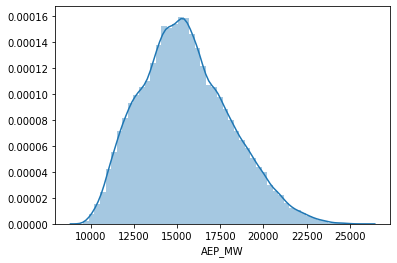

In [20]:
sns.distplot(df1['AEP_MW'])

In [21]:
df1['year'] = pd.DatetimeIndex(df['New_Date']).year


In [23]:
df1.head()

,Datetime,AEP_MW,New_Date,New_Time,year
0,2004-12-31 01:00:00,13478.0,2004-12-31,01:00:00,2004
1,2004-12-31 02:00:00,12865.0,2004-12-31,02:00:00,2004
2,2004-12-31 03:00:00,12577.0,2004-12-31,03:00:00,2004
3,2004-12-31 04:00:00,12517.0,2004-12-31,04:00:00,2004
4,2004-12-31 05:00:00,12670.0,2004-12-31,05:00:00,2004


In [29]:
df1['year'].unique()

array([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018])

In [32]:
df1[df1['year'] == 2013].nunique()

Datetime    8758
AEP_MW      5601
New_Date     365
New_Time      24
year           1
dtype: int64

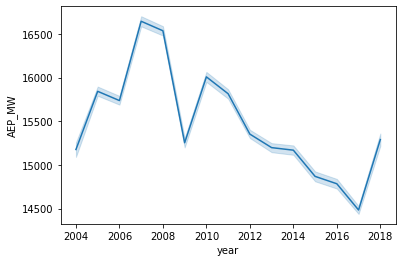

In [33]:
sns.lineplot(x=df['year'], y=df['AEP_MW'])

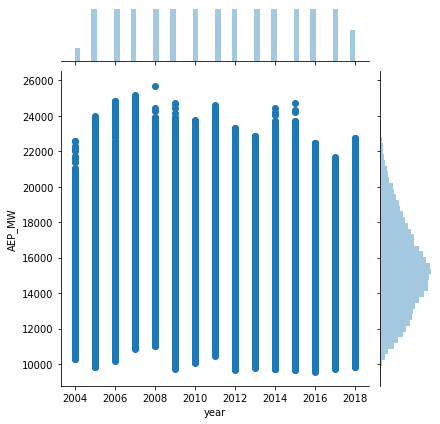

In [35]:
sns.jointplot(x=df1['year'], y=df1['AEP_MW'], data=df1)

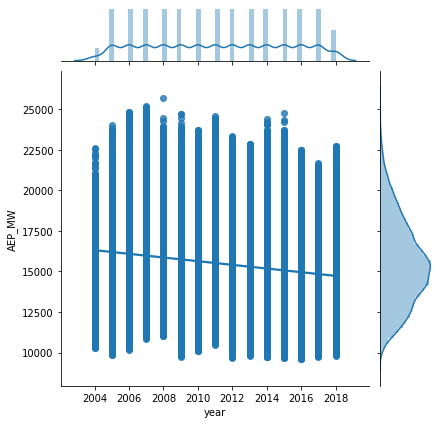

In [36]:
sns.jointplot(x=df1['year'], y=df1['AEP_MW'], data=df1, kind='reg')

In [56]:
df1

,Datetime,AEP_MW,New_Date,New_Time,year,time
0,2004-12-31 01:00:00,13478.0,2004-12-31,01:00:00,2004,00:00:00
1,2004-12-31 02:00:00,12865.0,2004-12-31,02:00:00,2004,00:00:00
2,2004-12-31 03:00:00,12577.0,2004-12-31,03:00:00,2004,00:00:00
3,2004-12-31 04:00:00,12517.0,2004-12-31,04:00:00,2004,00:00:00
4,2004-12-31 05:00:00,12670.0,2004-12-31,05:00:00,2004,00:00:00
...,...,...,...,...,...,...
121268,2018-01-01 20:00:00,21089.0,2018-01-01,20:00:00,2018,00:00:00
121269,2018-01-01 21:00:00,20999.0,2018-01-01,21:00:00,2018,00:00:00
121270,2018-01-01 22:00:00,20820.0,2018-01-01,22:00:00,2018,00:00:00
121271,2018-01-01 23:00:00,20415.0,2018-01-01,23:00:00,2018,00:00:00


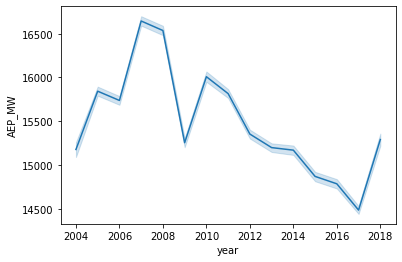

In [59]:
sns.lineplot(x=df1["year"],y=df1["AEP_MW"], data=df1)

In [61]:
df1['New_Time'] = df1['New_Time'].apply(str)

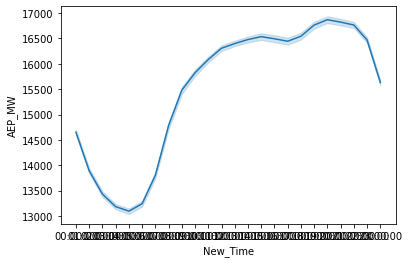

In [62]:
sns.lineplot(x=df1["New_Time"],y=df1["AEP_MW"], data=df1)